In [5]:
import pandas as pd

df = pd.read_csv("Telco_customer_churn.csv.csv")
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.lower()
)

df.columns


Index(['customerid', 'count', 'country', 'state', 'city', 'zip_code',
       'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure_months', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn_label', 'churn_value',
       'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

In [7]:
df.columns.tolist()


['customerid',
 'count',
 'country',
 'state',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure_months',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_reason']

In [8]:
columns_to_drop = [
    'customerid',
    'count',
    'country',
    'state',
    'city',
    'zip_code',
    'lat_long',
    'latitude',
    'longitude',
    'churn_label',
    'churn_score',
    'churn_reason'
]

df.drop(columns=columns_to_drop, inplace=True)


In [10]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df['total_charges'].fillna(df['total_charges'].median(), inplace=True)


C:\Users\0022u\AppData\Local\Temp\ipykernel_19968\1839764810.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_charges'].fillna(df['total_charges'].median(), inplace=True)


In [11]:
X = df.drop('churn_value', axis=1)
y = df['churn_value']


In [12]:
X = pd.get_dummies(X, drop_first=True)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


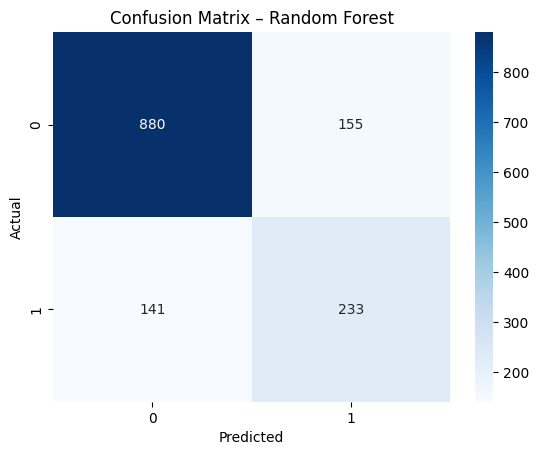

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_rf)


0.8337621741713812

In [24]:
import joblib

joblib.dump(rf, "customer_churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']